# Problem Statement

In this Linear Machine Learning model, We'll work on advertising dataset which consists of all money spend on different departments and Profit earned.

we are going to predict Profit with some indipendent variables from the dataset.

## 1. Importing Libraries and Collecting Data

In [197]:
#  Importing libraries for exploratory Data Analysis

import pandas as pd
import numpy as np

#  Importing libraries for Data Visualization

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [198]:
#  importing Data 
company = pd.read_csv("1000_Companies.csv")

## 2. Analyzing Data

In [199]:
#Observing Top 5 Rows
company.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [200]:
#Observing data type and null values for columns
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [201]:
company.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


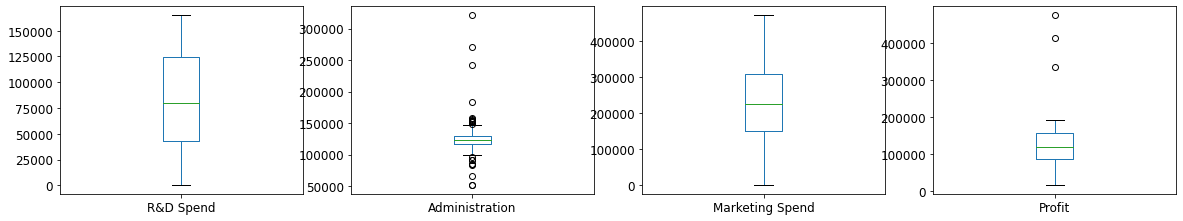

In [202]:
#Plotting Box plot to observe outliers
company.plot(kind='box', subplots=True, layout=(5,4) ,fontsize=12, figsize=(20,20))
plt.show()

## 3.Data Cleaning

In [203]:
#Observing counts of State
companies["State"].value_counts()

California    344
New York      334
Florida       322
Name: State, dtype: int64

In [204]:
#Applying One Hot Encoding
df=pd.get_dummies(companies["State"],drop_first=True)
df.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [205]:
company=pd.concat([company,df],axis=1)
company.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,1
1,162597.70,151377.59,443898.53,California,191792.06,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,1,0


In [206]:
#Observing correlation
company.corr()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
R&D Spend,1.000000,0.582434,0.978407,0.945245,0.029764,-0.015930
Administration,0.582434,1.000000,0.520465,0.741560,-0.009794,-0.011197
Marketing Spend,0.978407,0.520465,1.000000,0.917270,0.038872,-0.020495
Profit,0.945245,0.741560,0.917270,1.000000,0.016249,-0.013040
Florida,0.029764,-0.009794,0.038872,0.016249,1.000000,-0.488033
New York,-0.015930,-0.011197,-0.020495,-0.013040,-0.488033,1.000000


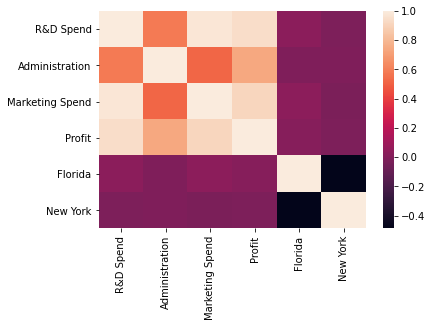

In [207]:
#Observing Correlation with Heatmap
sb.heatmap(company.corr())

In [208]:
company.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,1
1,162597.70,151377.59,443898.53,California,191792.06,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,1,0


In [209]:
#Dropping Feature with string type of data
company.drop(["State"],axis=1,inplace=True)
company.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [210]:
#Removing Outliers

# Collecting 25th Percentile
Q1 = company.quantile(0.25)

# Collecting 75th Percentile
Q3 = company.quantile(0.75)

# Collecting IQR
IQR = Q3 - Q1

# Set Lower Limit
lower_limit=Q1-1.5*IQR
# Set Upper Limit
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

for x in company.iloc[::-1].columns:
    for i in range(len(company[x])):
        if (company[x][i]>upper_limit[x]):                          #checking whether data is above upper limit
            print("{} having  {} will be changed".format(x,company[x][i]))
            company.replace(company[x][i],company[x].mean(),inplace=True)  #modifying data to mean values
        elif (company[x][i]<lower_limit[x]):                       #checking whether data is below lower limit
            print("{} having {} will be changed".format(x,company[x][i]))
            company.replace(company[x][i],company[x].mean(),inplace=True)  #modifying data to mean values
company.describe()

R&D Spend         -79137.000000
Administration     97893.035125
Marketing Spend   -84860.751287
Profit            -18507.664781
Florida               -1.500000
New York              -1.500000
dtype: float64
R&D Spend          246787.000000
Administration     147886.767725
Marketing Spend    544020.144412
Profit             260027.970749
Florida                 2.500000
New York                2.500000
dtype: float64
Administration having  151377.59 will be changed
Administration having 91391.77 will be changed
Administration having  148718.95 will be changed
Administration having 91790.61 will be changed
Administration having  156547.42 will be changed
Administration having  153514.11 will be changed
Administration having  153773.43 will be changed
Administration having  182645.56 will be changed
Administration having  153032.06 will be changed
Administration having  152701.92 will be changed
Administration having  157693.92 will be changed
Administration having 85047.44 will be change

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122567.064793,226205.058419,118679.595519,0.322000,0.334000
std,46537.567891,7114.896723,91578.393542,39728.653934,0.467477,0.471876
min,0.000000,99281.340000,0.000000,14681.400000,0.000000,0.000000
25%,43084.500000,116859.885625,150969.584600,85943.198543,0.000000,0.000000
50%,79936.000000,122720.665503,224517.887350,117641.466300,0.000000,0.000000
75%,124565.500000,128781.647525,308189.808525,154799.937300,1.000000,1.000000
max,165349.200000,147198.870000,471784.100000,192261.830000,1.000000,1.000000


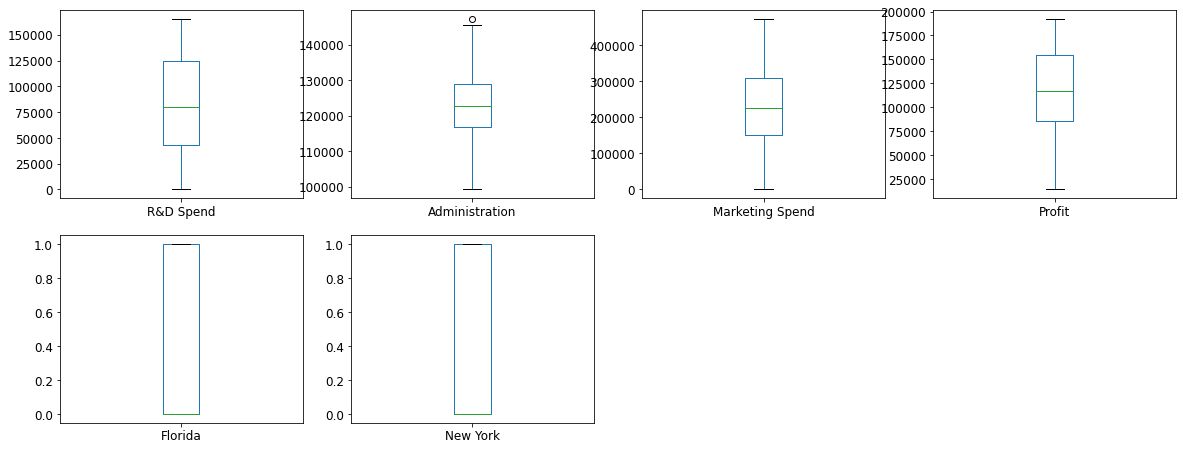

In [211]:
#Checking whether all outliers are replaced
company.plot(kind='box', subplots=True, layout=(5,4) ,fontsize=12, figsize=(20,20))
plt.show()

## 4.Train Data and Test Data

In [212]:
#Selecting data for Training and Testing
X = company.loc[:,["R&D Spend","Administration","Marketing Spend"]]
y = company.Profit

In [213]:
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.800000,471784.10
1,162597.70,122963.897612,443898.53
2,153441.51,101145.550000,407934.54
3,144372.41,118671.850000,383199.62
4,142107.34,122935.483919,366168.42


In [214]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [215]:
# training and testing model selection
from sklearn.model_selection import train_test_split

In [216]:
#Splitting Train and Test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.32,random_state=15)

In [217]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (680, 3)
X_test shape (320, 3)
y_train shape (680,)
y_test shape (320,)


In [218]:
# Importing machine learning algorithm
from sklearn.linear_model import LinearRegression

In [219]:
model = LinearRegression()

In [220]:
model.fit(X_train,y_train)

LinearRegression()

In [221]:
y_predict = model.predict(X_test)

In [222]:
X_test.head(5)

,R&D Spend,Administration,Marketing Spend
825,35679.00,115726.33280,137621.7671
374,143046.00,131582.78050,344786.6868
488,108627.00,126499.62580,278375.1323
608,126483.00,129136.68120,312828.3331
42,23640.93,122966.73783,148001.1100


In [223]:
pd.DataFrame([list(y_predict),list(y_test)]) #Compairing predicted value and actual value

,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
0,79440.34325,170819.119887,141525.518383,156722.547595,72219.160957,169262.479735,155432.298022,160290.308923,94169.274005,83092.362321,...,144502.624568,105569.599192,95095.257861,79227.571229,107451.565268,71728.633936,148611.677952,54951.985191,111065.926168,92241.559448
1,79513.16096,171235.862600,141832.007900,157086.234600,71498.490000,169673.363700,155791.128900,160667.424000,94297.527430,83178.925240,...,144820.319100,105740.760300,95226.996440,79299.588120,108552.040000,71772.426850,148944.837800,54932.635350,111257.774000,92362.557480


## 5. Accuracy Check

In [224]:
# Model evaluation 
from sklearn.metrics import r2_score, accuracy_score
from sklearn import metrics

In [225]:
# r2 gives accuracy of the model
r2_score(y_test,y_predict)*100

99.94480872379063

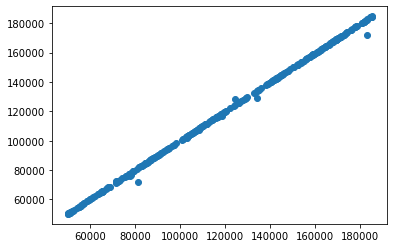

In [226]:
plt.scatter(y_test,y_predict)

In [227]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 341.3271247362247
MSE: 903025.3811656922
RMSE: 950.2764761719045
